In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np 
import pandas as pd
import skimage
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras import backend as BK
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix




In [2]:
files=[]
import os
for dirname, _, filenames in os.walk('C:/Users/20109/E_Hussien/Dataset/training'):
    for filename in filenames:
        
        files.append(os.path.join(dirname, filename))

In [3]:
print(len(files))

900


In [4]:
train = tf.keras.preprocessing.image_dataset_from_directory(
 'C:/Users/20109/E_Hussien/Dataset/training',
  validation_split=0.2,
  subset="training",
    label_mode='categorical',
  image_size=(128,128),
  batch_size=128,
seed =123)

val = tf.keras.preprocessing.image_dataset_from_directory(
 'C:/Users/20109/E_Hussien/Dataset/training',
  validation_split=0.2,
  subset="validation",
    label_mode='categorical',
  image_size=(128, 128),
  batch_size=128,
seed=123)

Found 900 files belonging to 5 classes.
Using 720 files for training.
Found 900 files belonging to 5 classes.
Using 180 files for validation.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/20109/E_Hussien/Dataset/testing',
    color_mode='rgb',
    image_size=(128,128),
  label_mode='categorical',
  batch_size=128,
    seed=123
)

Found 100 files belonging to 5 classes.


In [6]:
def display_20_image(images):
 
    plt.figure(figsize=(10, 10))
    for images, labels in images.take(5):
        for i in range(20):
            ax = plt.subplot(5, 4, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.axis("off")

    plt.show()

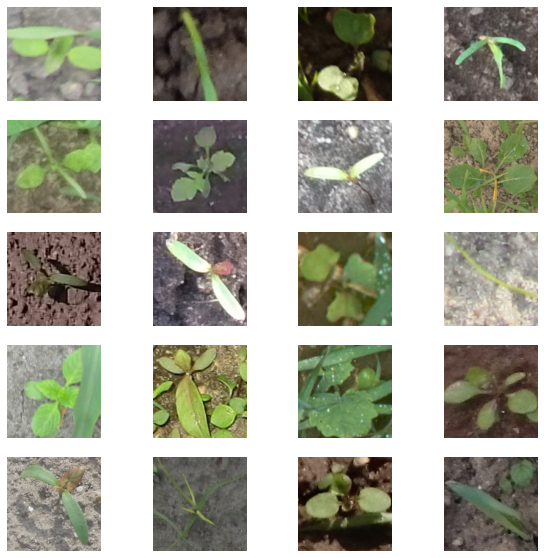

In [7]:
display_20_image(train)

In [9]:
X_train = np.concatenate([x for x,y in train], axis =0)
y_train= np.concatenate([y for x,y in train], axis =0)
X_val = np.concatenate([x for x,y in val], axis =0)
y_val= np.concatenate([y for x,y in val], axis =0)

In [10]:
tf.compat.v1.set_random_seed(200)
np.random.seed(8)

In [11]:
from tensorflow.keras.applications import VGG16
 
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128,128, 3))

In [12]:
for layer in vgg_model.layers:
    layer.trainable = False

x = vgg_model.layers[6].output
x= MaxPooling2D(pool_size=(2, 2))(x)
x= Conv2D(300, kernel_size=3, activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(200, activation = "relu")(x)
x = Dense(5, activation='relu')(x)

from tensorflow.keras.models import Model
vgg_model_transfer = Model(inputs=vgg_model.input, outputs=x)

In [13]:
print(vgg_model_transfer.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [14]:
batchSize = 80
nEpochs = 39
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
vgg_model_transfer.compile(loss='categorical_crossentropy', 
                           optimizer=opt, 
                           metrics=['accuracy'])
history = vgg_model_transfer.fit(X_train, y_train, batch_size=batchSize, epochs=nEpochs, verbose=1,
                                 validation_data=(X_val,y_val))

Epoch 1/39
9/9 [==============================] - 19s 2s/step - loss: 7.2630 - accuracy: 0.2028 - val_loss: 6.0279 - val_accuracy: 0.2000
Epoch 2/39
9/9 [==============================] - 18s 2s/step - loss: 7.3695 - accuracy: 0.2056 - val_loss: 6.0244 - val_accuracy: 0.2000
Epoch 3/39
9/9 [==============================] - 18s 2s/step - loss: 7.3647 - accuracy: 0.2375 - val_loss: 6.0257 - val_accuracy: 0.2000
Epoch 4/39
9/9 [==============================] - 18s 2s/step - loss: 7.3594 - accuracy: 0.3875 - val_loss: 6.0233 - val_accuracy: 0.2278
Epoch 5/39
9/9 [==============================] - 18s 2s/step - loss: 7.3494 - accuracy: 0.4431 - val_loss: 6.0225 - val_accuracy: 0.2556
Epoch 6/39
9/9 [==============================] - 18s 2s/step - loss: 7.3282 - accuracy: 0.4306 - val_loss: 6.0266 - val_accuracy: 0.2667
Epoch 7/39
9/9 [==============================] - 18s 2s/step - loss: 7.2977 - accuracy: 0.3125 - val_loss: 6.0353 - val_accuracy: 0.2167
Epoch 8/39
9/9 [==================

In [17]:
print(vgg_model_transfer.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [18]:
X_test = np.concatenate([x for x,y in test_ds], axis =0)
y_test= np.concatenate([y for x,y in test_ds], axis =0)

In [19]:
y_predict_prob = vgg_model_transfer.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)

4/4 [==============================] - 2s 428ms/step


In [20]:
y_predict_prob_val = vgg_model_transfer.predict(X_val)
y_predict_val = y_predict_prob_val.argmax(axis=-1)

6/6 [==============================] - 3s 567ms/step


In [21]:
y_predict_prob_train = vgg_model_transfer.predict(X_train)

y_predict_train = y_predict_prob_train.argmax(axis=-1)

23/23 [==============================] - 13s 563ms/step


In [22]:
print(classification_report(y_train.argmax(axis=-1),y_predict_train))


              precision    recall  f1-score   support

           0       0.20      1.00      0.33       141
           1       0.00      0.00      0.00       144
           2       0.00      0.00      0.00       134
           3       0.00      0.00      0.00       154
           4       0.00      0.00      0.00       147

    accuracy                           0.20       720
   macro avg       0.04      0.20      0.07       720
weighted avg       0.04      0.20      0.06       720



C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

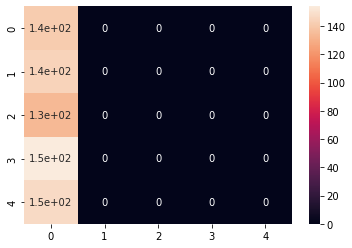

In [23]:
sn.heatmap(confusion_matrix(y_train.argmax(axis=-1),y_predict_train), annot=True)

In [24]:
print(classification_report(y_val.argmax(axis=-1),y_predict_val));

              precision    recall  f1-score   support

           0       0.22      1.00      0.36        39
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        33

    accuracy                           0.22       180
   macro avg       0.04      0.20      0.07       180
weighted avg       0.05      0.22      0.08       180



C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

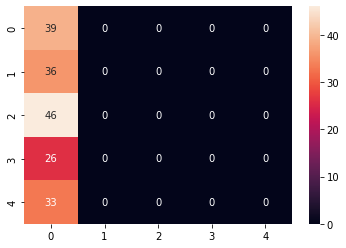

In [25]:
sn.heatmap(confusion_matrix(y_val.argmax(axis=-1),y_predict_val), annot=True)

In [26]:
print(classification_report(y_test.argmax(axis=-1),y_predict))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04      0.20      0.07       100



C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

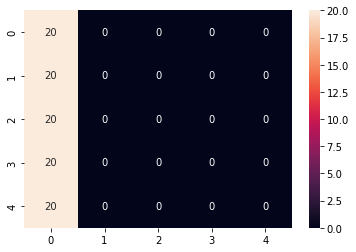

In [27]:
conf_mx = confusion_matrix(y_test.argmax(axis=-1), y_predict)
sn.heatmap(conf_mx, annot=True)

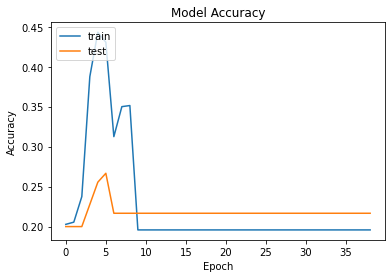

In [28]:

k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

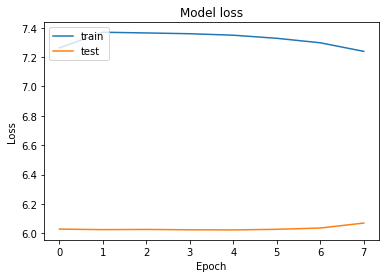

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Regression

In [46]:
y_train_mapped = {0:1, 1:2, 2:3,3:4, 4:6}
y_train= np.concatenate([y for x,y in train], axis =0).argmax(axis=-1)
y_val= np.concatenate([y for x,y in val], axis =0).argmax(axis=-1)
y_ts = y_test.argmax(axis=-1)

In [47]:
y_t = np.array([y_train_mapped[key] for key in y_train]).astype(float)
y_v = np.array([y_train_mapped[key] for key in y_val]).astype(float)
y_ts = np.array([y_train_mapped[key] for key in y_ts]).astype(float)

In [30]:
vgg_regression =VGG16(
    include_top=False, weights='imagenet', 
    input_shape=(128,128,3),
    classifier_activation="linear"
)

In [31]:
for layer in vgg_regression.layers:
    layer.trainable = False
  
x = vgg_regression.layers[6].output

x= Conv2D(500, kernel_size=5, activation='tanh', padding='same')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100, activation = "relu")(x)
x = Dense(1, activation='relu6')(x)
from tensorflow.keras.models import Model
vgg_regression = Model(inputs=vgg_regression.input, outputs=x)

In [34]:
batchSize = 80
nEpochs = 20
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)
opt = tensorflow.keras.optimizers.SGD(learning_rate=0.0001)
vgg_regression.compile(loss='mean_squared_error', 
                           optimizer=opt, 
                           metrics=['mean_squared_error'])
history_regreesion = vgg_regression.fit(X_train, y_train, batch_size=batchSize, epochs=nEpochs, verbose=1,
                                 validation_data=(X_val,y_val))

Epoch 1/20
9/9 [==============================] - 42s 5s/step - loss: 0.2002 - mean_squared_error: 0.2002 - val_loss: 0.2008 - val_mean_squared_error: 0.2008
Epoch 2/20
9/9 [==============================] - 42s 5s/step - loss: 0.2000 - mean_squared_error: 0.2000 - val_loss: 0.2008 - val_mean_squared_error: 0.2008
Epoch 3/20
9/9 [==============================] - 44s 5s/step - loss: 0.2000 - mean_squared_error: 0.2000 - val_loss: 0.2008 - val_mean_squared_error: 0.2008
Epoch 4/20
9/9 [==============================] - 36s 4s/step - loss: 0.2000 - mean_squared_error: 0.2000 - val_loss: 0.2008 - val_mean_squared_error: 0.2008
Epoch 5/20
9/9 [==============================] - 59s 7s/step - loss: 0.2000 - mean_squared_error: 0.2000 - val_loss: 0.2008 - val_mean_squared_error: 0.2008
Epoch 6/20
9/9 [==============================] - 45s 5s/step - loss: 0.2000 - mean_squared_error: 0.2000 - val_loss: 0.2008 - val_mean_squared_error: 0.2008
Epoch 7/20
9/9 [==============================] - 45

In [35]:
print(vgg_regression.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [36]:
y_predict = vgg_regression.predict(X_test)

4/4 [==============================] - 3s 611ms/step


In [37]:
y_val_predict = vgg_regression.predict(X_val)

6/6 [==============================] - 6s 983ms/step


In [38]:
y_predict_train = vgg_regression.predict(X_train)

23/23 [==============================] - 27s 1s/step


In [49]:
#Mean Square Error for Train Data
print(mean_squared_error(y_predict_train, y_t, squared=False))

3.666477267835648


In [50]:
#Mean Square Error for validation Data
mean_squared_error(y_val_predict, y_v, squared=False)

3.493035722344009

In [51]:
#Mean Square Error for Test Data
mean_squared_error(y_predict, y_ts, squared=False)

3.6327805978192425

In [52]:
y_predict = y_predict.astype(int)
y_val_predict = y_val_predict.astype(int)
y_predict_train = y_predict_train.astype(int)

In [53]:
print(classification_report(y_predict, y_ts))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     100.0
         1.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00       0.0
         3.0       0.00      0.00      0.00       0.0
         4.0       0.00      0.00      0.00       0.0
         6.0       0.00      0.00      0.00       0.0

    accuracy                           0.00     100.0
   macro avg       0.00      0.00      0.00     100.0
weighted avg       0.00      0.00      0.00     100.0



C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [54]:
print(classification_report(y_predict_train, y_t))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     720.0
         1.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00       0.0
         3.0       0.00      0.00      0.00       0.0
         4.0       0.00      0.00      0.00       0.0
         6.0       0.00      0.00      0.00       0.0

    accuracy                           0.00     720.0
   macro avg       0.00      0.00      0.00     720.0
weighted avg       0.00      0.00      0.00     720.0



C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [55]:
print(classification_report(y_predict_val, y_v))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     180.0
         1.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00       0.0
         3.0       0.00      0.00      0.00       0.0
         4.0       0.00      0.00      0.00       0.0
         6.0       0.00      0.00      0.00       0.0

    accuracy                           0.00     180.0
   macro avg       0.00      0.00      0.00     180.0
weighted avg       0.00      0.00      0.00     180.0



C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_cla

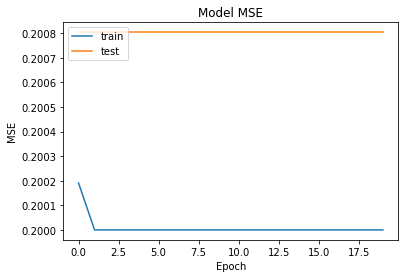

In [56]:

k = ''
if 'mean_squared_error' in history_regreesion.history :
    k = 'mean_squared_error'    

if 'mse' in history_regreesion.history :
    k = 'mse'
    
if k != '' :    
    plt.plot(history_regreesion.history[k])
    plt.plot(history_regreesion.history['val_'+k])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

##Regulaization

In [57]:
X_train = np.concatenate([x for x,y in train], axis =0)
y_train= np.concatenate([y for x,y in train], axis =0)
X_val = np.concatenate([x for x,y in val], axis =0)
y_val= np.concatenate([y for x,y in val], axis =0)

In [58]:
 vgg_model_regualized = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

In [64]:
for layer in vgg_model_regualized.layers:
    layer.trainable = False

x = vgg_model_regualized.layers[6].output
x= MaxPooling2D(pool_size=(2, 2))(x)
x= Conv2D(300, kernel_size=3, activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dropout(0.02)(x)
x = Dense(5, activation='relu')(x)
from tensorflow.keras.models import Model
vgg_model_transferL = Model(inputs=vgg_model_regualized.input, outputs=x)

In [65]:
batchSize = 80
nEpochs = 10
sgd = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
vgg_model_transferL.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])
historyL = vgg_model_transferL.fit(X_train, y_train, batch_size=batchSize, epochs=nEpochs, verbose=1,
                                 validation_data=(X_val, y_val))

Epoch 1/10
9/9 [==============================] - 17s 2s/step - loss: nan - accuracy: 0.1833 - val_loss: nan - val_accuracy: 0.2167
Epoch 2/10
9/9 [==============================] - 16s 2s/step - loss: nan - accuracy: 0.1958 - val_loss: nan - val_accuracy: 0.2167
Epoch 3/10
9/9 [==============================] - 16s 2s/step - loss: nan - accuracy: 0.1958 - val_loss: nan - val_accuracy: 0.2167
Epoch 4/10
9/9 [==============================] - 16s 2s/step - loss: nan - accuracy: 0.1958 - val_loss: nan - val_accuracy: 0.2167
Epoch 5/10
9/9 [==============================] - 17s 2s/step - loss: nan - accuracy: 0.1958 - val_loss: nan - val_accuracy: 0.2167
Epoch 6/10
9/9 [==============================] - 20s 2s/step - loss: nan - accuracy: 0.1958 - val_loss: nan - val_accuracy: 0.2167
Epoch 7/10
9/9 [==============================] - 30s 3s/step - loss: nan - accuracy: 0.1958 - val_loss: nan - val_accuracy: 0.2167
Epoch 8/10
9/9 [==============================] - 24s 3s/step - loss: nan - 

In [66]:
print(vgg_model_transferL.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [67]:
y_predict_probL = vgg_model_transferL.predict(X_test)
y_predictL = y_predict_probL.argmax(axis=-1)

4/4 [==============================] - 2s 342ms/step


In [68]:
y_predict_probL_train = vgg_model_transferL.predict(X_train)
y_predictL_train = y_predict_probL_train.argmax(axis=-1)

23/23 [==============================] - 11s 484ms/step


In [69]:
y_predict_probL_val = vgg_model_transferL.predict(X_val)
y_predictL_val = y_predict_probL_val.argmax(axis=-1)

6/6 [==============================] - 3s 449ms/step


In [70]:
print(classification_report(y_predictL_train, y_train.argmax(-1)))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33       720
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.20       720
   macro avg       0.20      0.04      0.07       720
weighted avg       1.00      0.20      0.33       720



C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

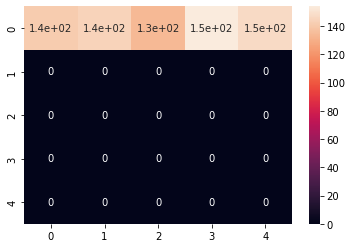

In [71]:
sn.heatmap(confusion_matrix(y_predictL_train, y_train.argmax(-1)),annot=True)

In [72]:
print(classification_report(y_predictL_val, y_val.argmax(axis=-1)))

              precision    recall  f1-score   support

           0       1.00      0.22      0.36       180
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.22       180
   macro avg       0.20      0.04      0.07       180
weighted avg       1.00      0.22      0.36       180



C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

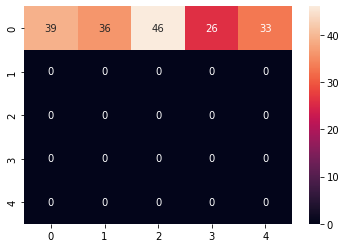

In [73]:
sn.heatmap(confusion_matrix(y_predictL_val, y_val.argmax(-1)),annot=True)

In [74]:
print(classification_report(y_test.argmax(axis=-1), y_predictL))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04      0.20      0.07       100



C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

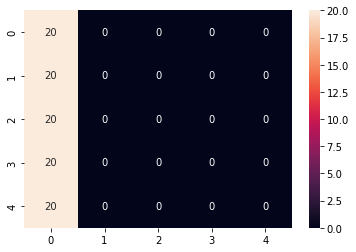

In [75]:
conf_mx = confusion_matrix(y_test.argmax(axis=-1), y_predictL)
sn.heatmap(conf_mx, annot= True)

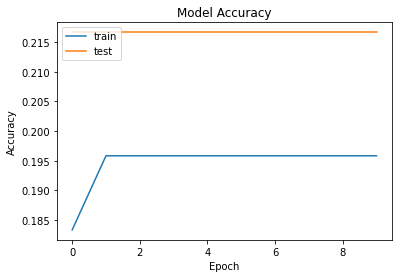

In [76]:
k = ''
if 'accuracy' in historyL.history :
    k = 'accuracy'    

if 'acc' in historyL.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(historyL.history[k])
    plt.plot(historyL.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

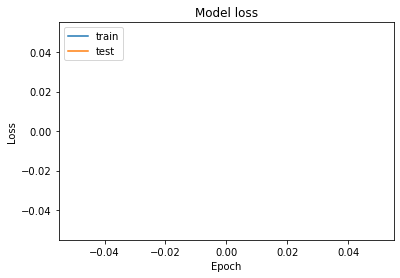

In [77]:
plt.plot(historyL.history['loss'])
plt.plot(historyL.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Data Augmentation

In [110]:
datagen = ImageDataGenerator(
        rotation_range=10, 
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        zoom_range=0.2,
        horizontal_flip=True, 
        brightness_range=[0.2,1.2])

In [111]:
train_generator = datagen.flow_from_directory(
                  directory='C:/Users/20109/E_Hussien/Dataset/training',
                  target_size=(128, 128), 
                  color_mode="rgb",
                  batch_size=1, 
                  class_mode="binary",
                  seed=2020 )


Found 900 images belonging to 5 classes.


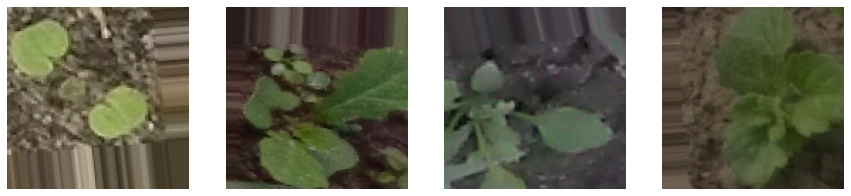

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):
     image = next(train_generator)[0].astype('uint8')
        
     image = np.squeeze(image)

     ax[i].imshow(image)
     ax[i].axis('off')


In [82]:
datagen = ImageDataGenerator(rescale=1/255.,validation_split=0.2)

In [83]:
X_train = np.concatenate([X_train,X_val])
y_train = np.concatenate([y_train,y_val])

In [84]:
len(X_train)

900

In [87]:
training_generator = datagen.flow(X_train, y_train, batch_size=64,subset='training',seed=7)
validation_generator = datagen.flow(X_train, y_train, batch_size=64,subset='validation',seed=7)

In [88]:
len(training_generator)

12

In [90]:
historyL = vgg_model_transferL.fit_generator(training_generator,steps_per_epoch=(len(X_train)*0.8)//64,
                                             epochs=10, 
                                            validation_data=validation_generator, 
                                             validation_steps=(len(X_train)*0.2)//64)

Epoch 1/10


C:\Users\20109\AppData\Local\Temp\ipykernel_14648\374307739.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  historyL = vgg_model_transferL.fit_generator(training_generator,steps_per_epoch=(len(X_train)*0.8)//64,


11/11 [==============================] - 14s 1s/step - loss: nan - accuracy: 0.1951 - val_loss: nan - val_accuracy: 0.2031
Epoch 2/10
11/11 [==============================] - 16s 1s/step - loss: nan - accuracy: 0.2012 - val_loss: nan - val_accuracy: 0.1719
Epoch 3/10
11/11 [==============================] - 23s 2s/step - loss: nan - accuracy: 0.2027 - val_loss: nan - val_accuracy: 0.1953
Epoch 4/10
11/11 [==============================] - 21s 2s/step - loss: nan - accuracy: 0.1875 - val_loss: nan - val_accuracy: 0.1875
Epoch 5/10
11/11 [==============================] - 19s 2s/step - loss: nan - accuracy: 0.1951 - val_loss: nan - val_accuracy: 0.1797
Epoch 6/10
11/11 [==============================] - 17s 2s/step - loss: nan - accuracy: 0.1982 - val_loss: nan - val_accuracy: 0.1719
Epoch 7/10
11/11 [==============================] - 16s 1s/step - loss: nan - accuracy: 0.2012 - val_loss: nan - val_accuracy: 0.1953
Epoch 8/10
11/11 [==============================] - 16s 1s/step - loss: n

In [91]:
print(vgg_model_transferL.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [92]:
y_predict_probL = vgg_model_transferL.predict(test_ds)
y_predictL = y_predict_probL.argmax(axis=-1)

1/1 [==============================] - 2s 2s/step


In [93]:
y_predict_probL_train = vgg_model_transferL.predict(X_train)
y_predictL_train = y_predict_probL_train.argmax(axis=-1)

29/29 [==============================] - 14s 471ms/step


In [94]:
y_predict_probL_val = vgg_model_transferL.predict(X_val)
y_predictL_val = y_predict_probL_val.argmax(axis=-1)

6/6 [==============================] - 3s 456ms/step


              precision    recall  f1-score   support

           0       0.20      1.00      0.33       180
           1       0.00      0.00      0.00       180
           2       0.00      0.00      0.00       180
           3       0.00      0.00      0.00       180
           4       0.00      0.00      0.00       180

    accuracy                           0.20       900
   macro avg       0.04      0.20      0.07       900
weighted avg       0.04      0.20      0.07       900



C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

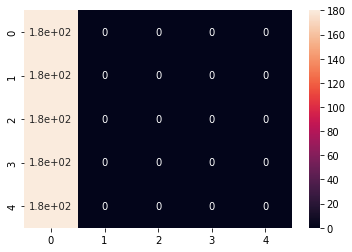

In [95]:
print(classification_report(y_train.argmax(axis=-1),y_predictL_train))
conf_mx = confusion_matrix(y_train.argmax(axis=-1),y_predictL_train)
sn.heatmap(conf_mx, annot= True)

              precision    recall  f1-score   support

           0       0.22      1.00      0.36        39
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        33

    accuracy                           0.22       180
   macro avg       0.04      0.20      0.07       180
weighted avg       0.05      0.22      0.08       180



C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

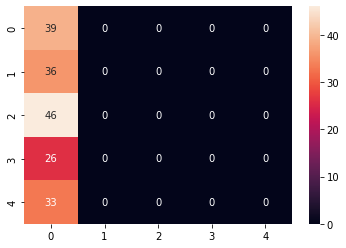

In [96]:
print(classification_report(y_val.argmax(axis=-1),y_predictL_val))
conf_mx = confusion_matrix(y_val.argmax(axis=-1),y_predictL_val)
sn.heatmap(conf_mx, annot= True)

              precision    recall  f1-score   support

           0       0.20      1.00      0.33        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04      0.20      0.07       100



C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

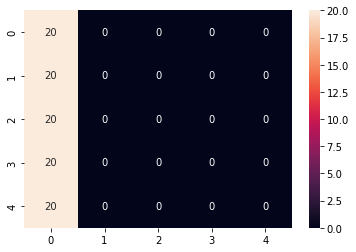

In [97]:
print(classification_report(y_test.argmax(axis=-1),y_predictL))
conf_mx = confusion_matrix(y_test.argmax(axis=-1),y_predictL)
sn.heatmap(conf_mx, annot= True)

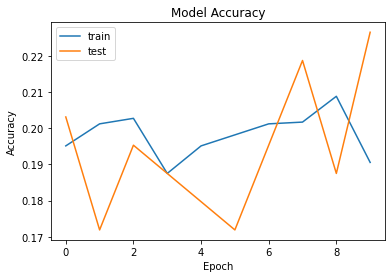

In [98]:
k = ''
if 'accuracy' in historyL.history :
    k = 'accuracy'    

if 'acc' in historyL.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(historyL.history[k])
    plt.plot(historyL.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

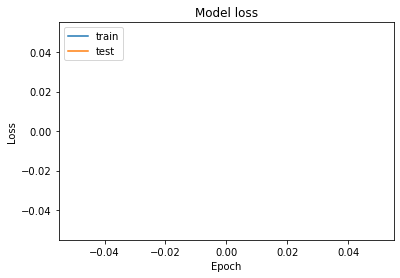

In [99]:
plt.plot(historyL.history['loss'])
plt.plot(historyL.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()